In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
#Global Variables
n_clusters = 4
max_iters = 100

In [5]:
class ClusteringBase:

    def initialize_centroids(self, Data):
        # Randomly select centroids from the data points
        centroids_indices = np.random.choice(Data.shape[0], n_clusters, replace=False)
        centroids = Data[centroids_indices]
        return centroids

    def Euclidean_distance(self, Data, centroids):
        # Calculate the Euclidean distance between each data point and centroids
        distances = np.sqrt(((Data - centroids[:, np.newaxis]) ** 2).sum(axis=2))
        # Assign each data point to the closest centroid
        labels = np.argmin(distances, axis=0)
        return labels

    def update_centroids(self, Data, labels):
        centroids = []
        for i in range(n_clusters):
            # Calculate the mean of the data points assigned to each cluster
            centroid = Data[labels == i].mean(axis=0)
            centroids.append(centroid)
        return np.array(centroids)

    def fit(self, Data):
        # Initialize centroids
        centroids = self.initialize_centroids(Data)

        for _ in range(max_iters):
            # Assign data points to the closest centroid
            labels = self.Euclidean_distance(Data, centroids)
            # Update centroids based on the assigned data points
            new_centroids = self.update_centroids(Data, labels)
            # Check if centroids have converged
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids

        return labels, centroids

In [6]:
from sklearn.datasets import make_blobs
class Creat_dataset_sklearn:
    @staticmethod
    def create_dataset(n_samples, n_features, n_clusters):
        Data, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)
        return Data

[[-8.55503989  7.06461794]
 [-6.13753182 -6.58081701]
 [-6.32130028 -6.8041042 ]
 ...
 [ 3.69047995  4.60555175]
 [-7.48913939 -7.0670809 ]
 [-9.40049578  7.11430104]]


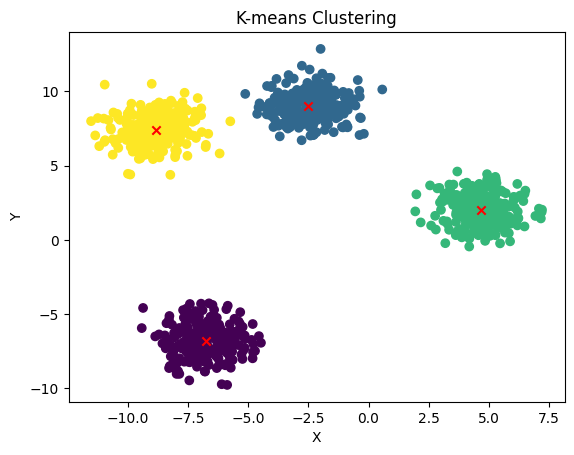

In [9]:
import matplotlib.pyplot as plt

class driver_Kmeans:
    @staticmethod
    def plot_clusters(Data, labels, centroids):
        plt.scatter(Data[:, 0], Data[:, 1], c=labels, cmap='viridis')
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
        plt.title('K-means Clustering')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()

class Kmeans(ClusteringBase):
    def fit_and_visualize(self, Data):
        self.labels, self.centroids = self.fit(Data)
        driver_Kmeans.plot_clusters(Data, self.labels, self.centroids)




# Generate dataset
n_samples = 1000
n_features = 2
dataset = Creat_dataset_sklearn.create_dataset(n_samples, n_features,n_clusters)
print(dataset)
# Create and fit KMeans model
kmeans = Kmeans()
kmeans.fit_and_visualize(Data=dataset)

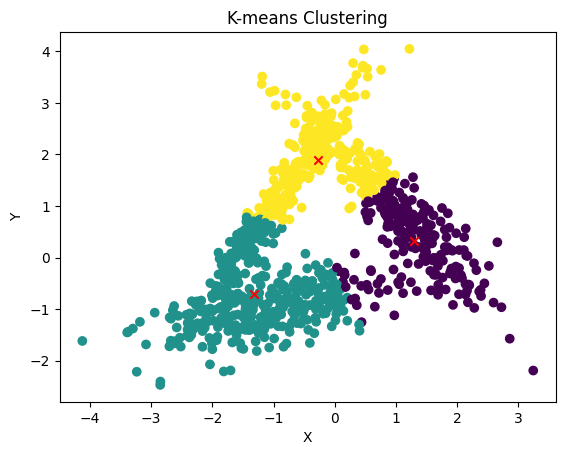

In [10]:
from sklearn.datasets import make_classification

n_samples = 1000
n_features = 2
n_clusters = 3
dataset, _ = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=2,
    n_redundant=0,
    n_classes=n_clusters,
    n_clusters_per_class=1,
    random_state=42
)

kmeans = Kmeans()
kmeans.fit_and_visualize(Data=dataset)

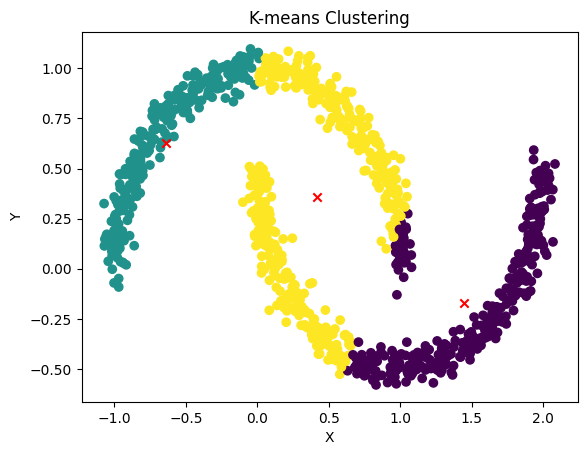

In [12]:
from sklearn.datasets import make_moons

n_samples = 1000
noise = 0.05
dataset, _ = make_moons(n_samples=n_samples, noise=noise)
kmeans = Kmeans()
kmeans.fit_and_visualize(Data=dataset)